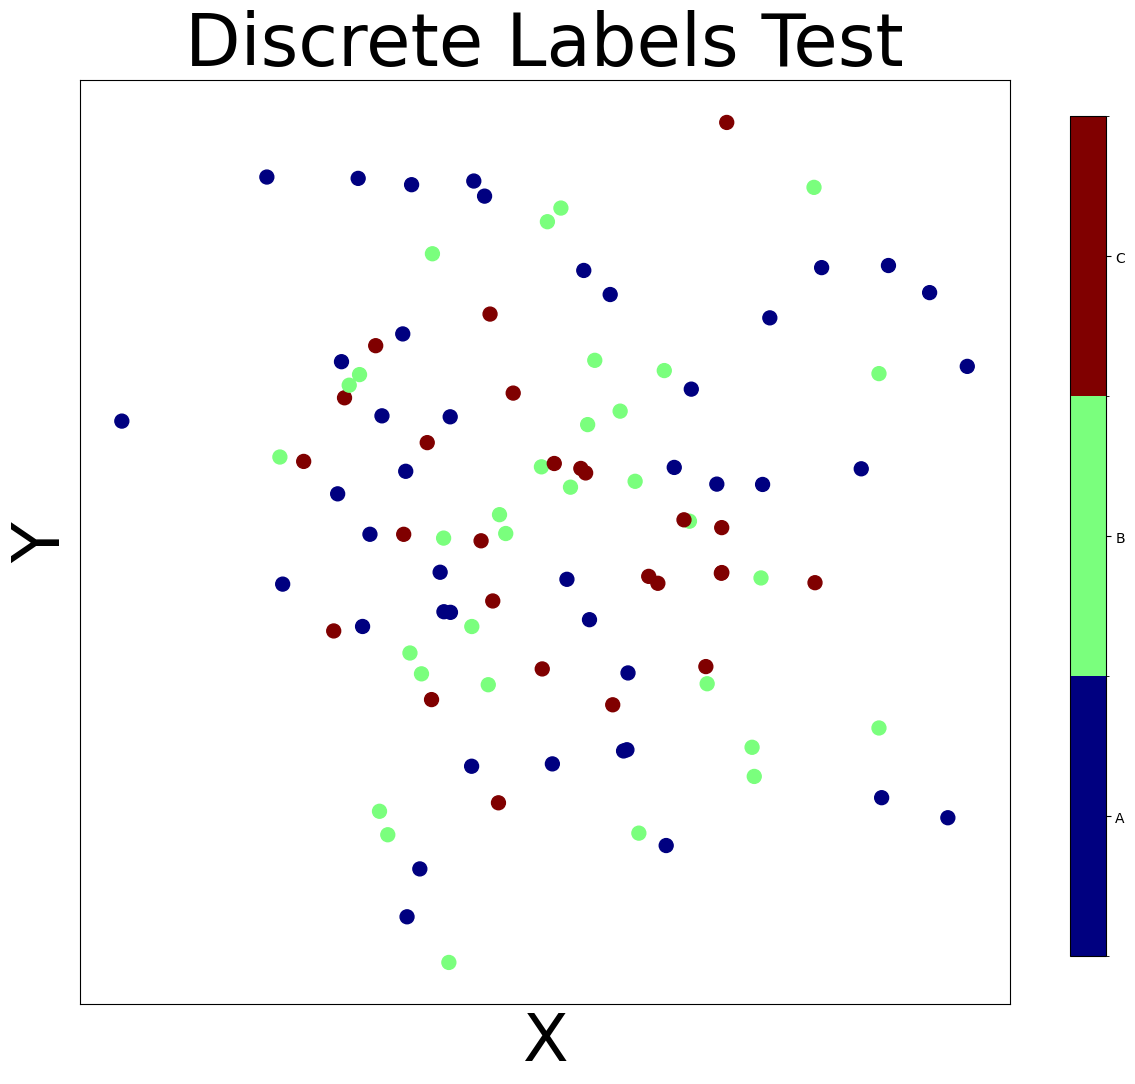

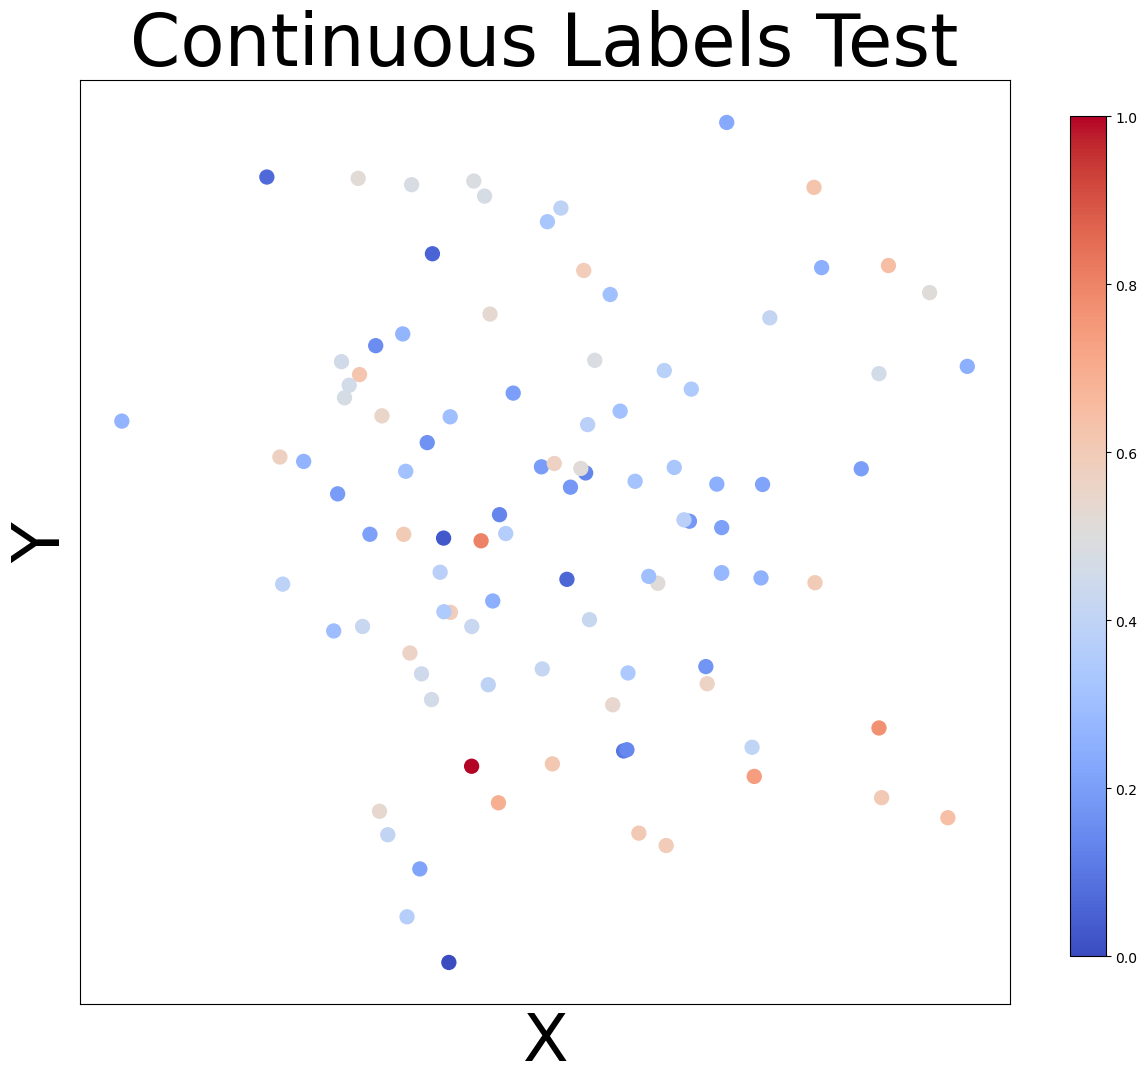

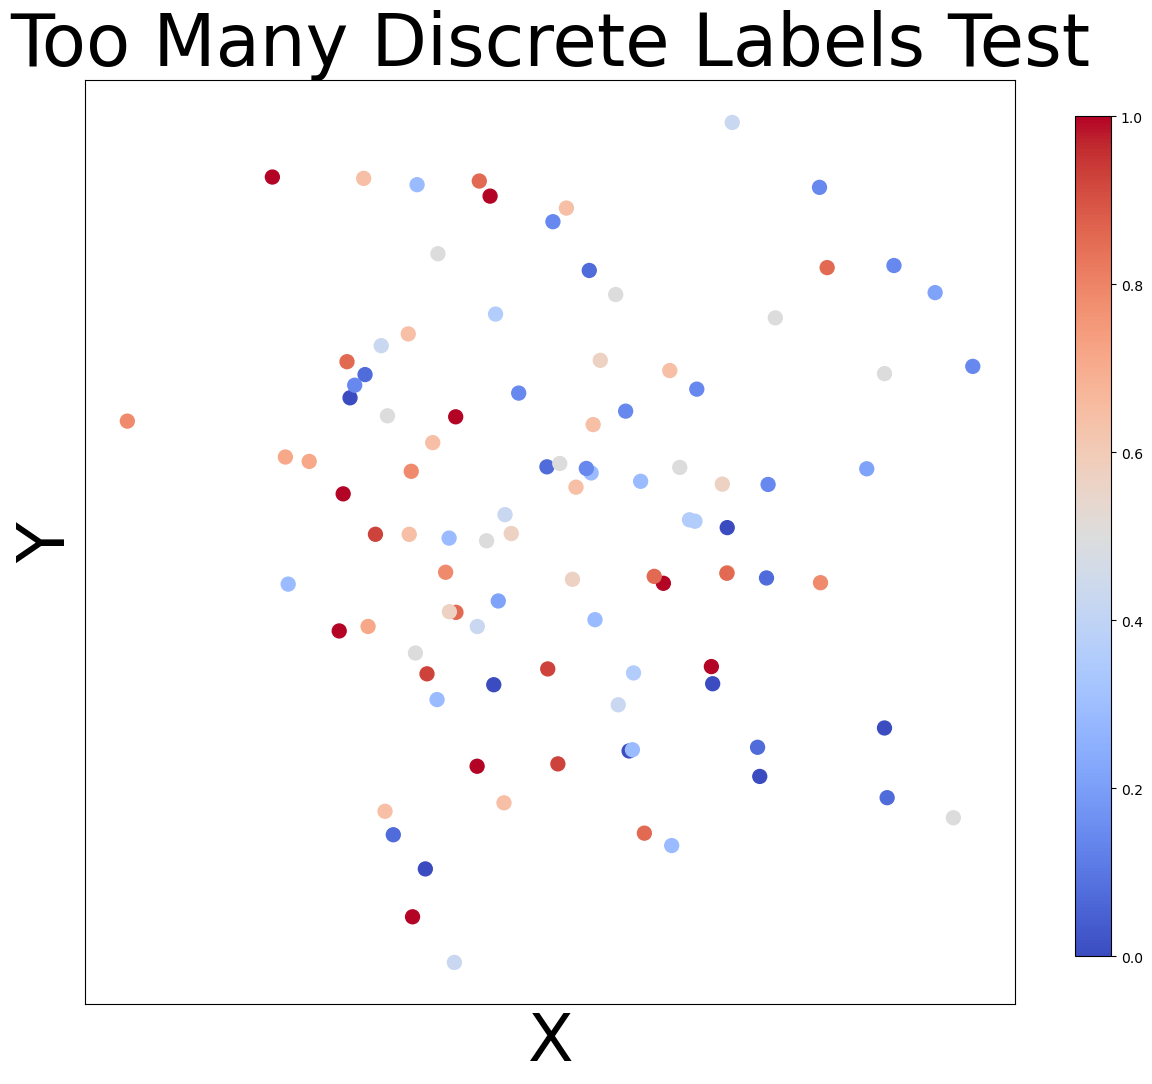

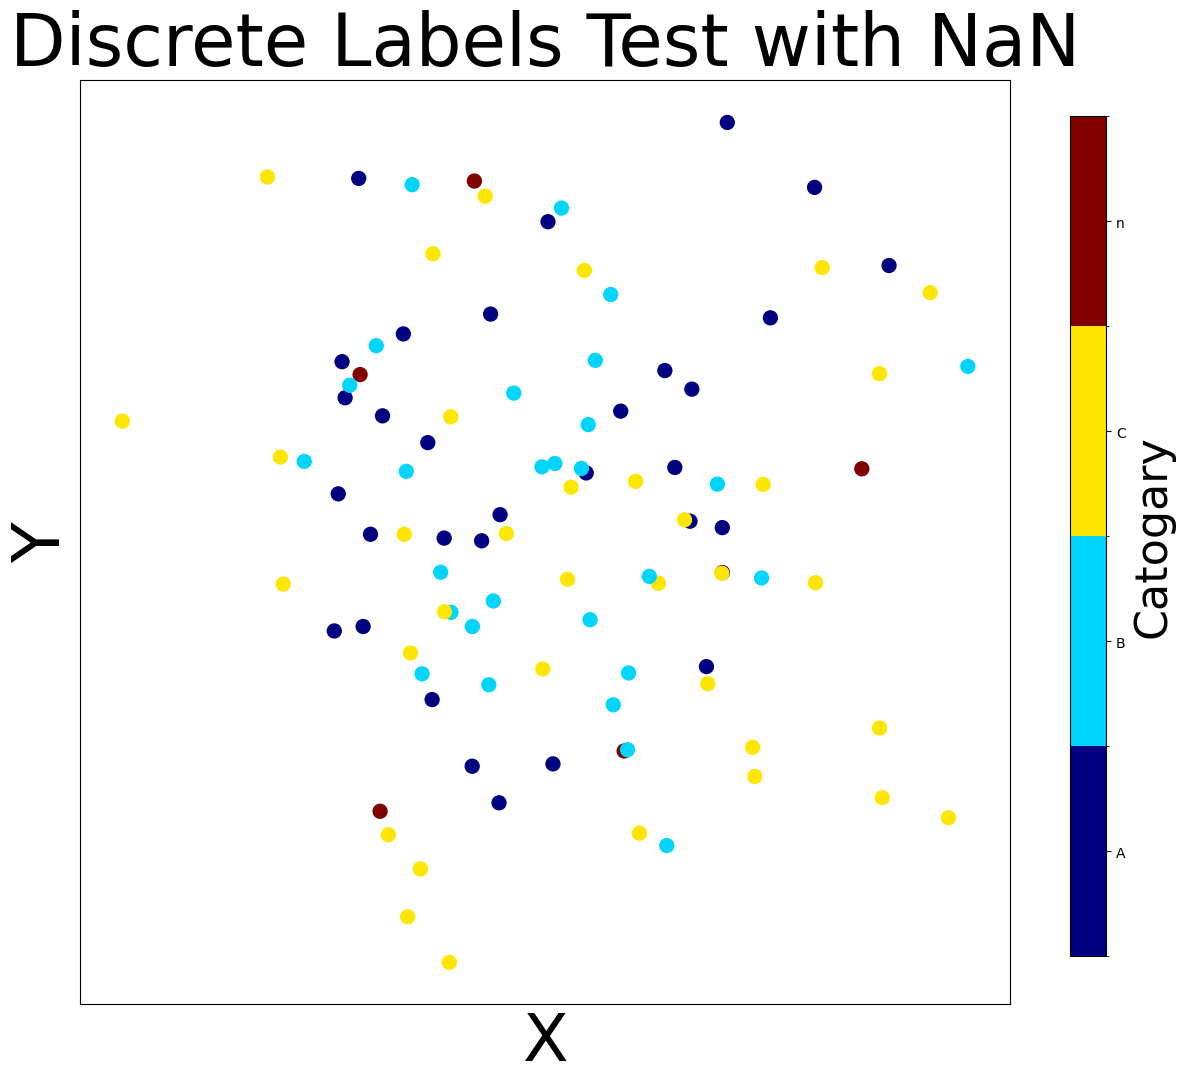

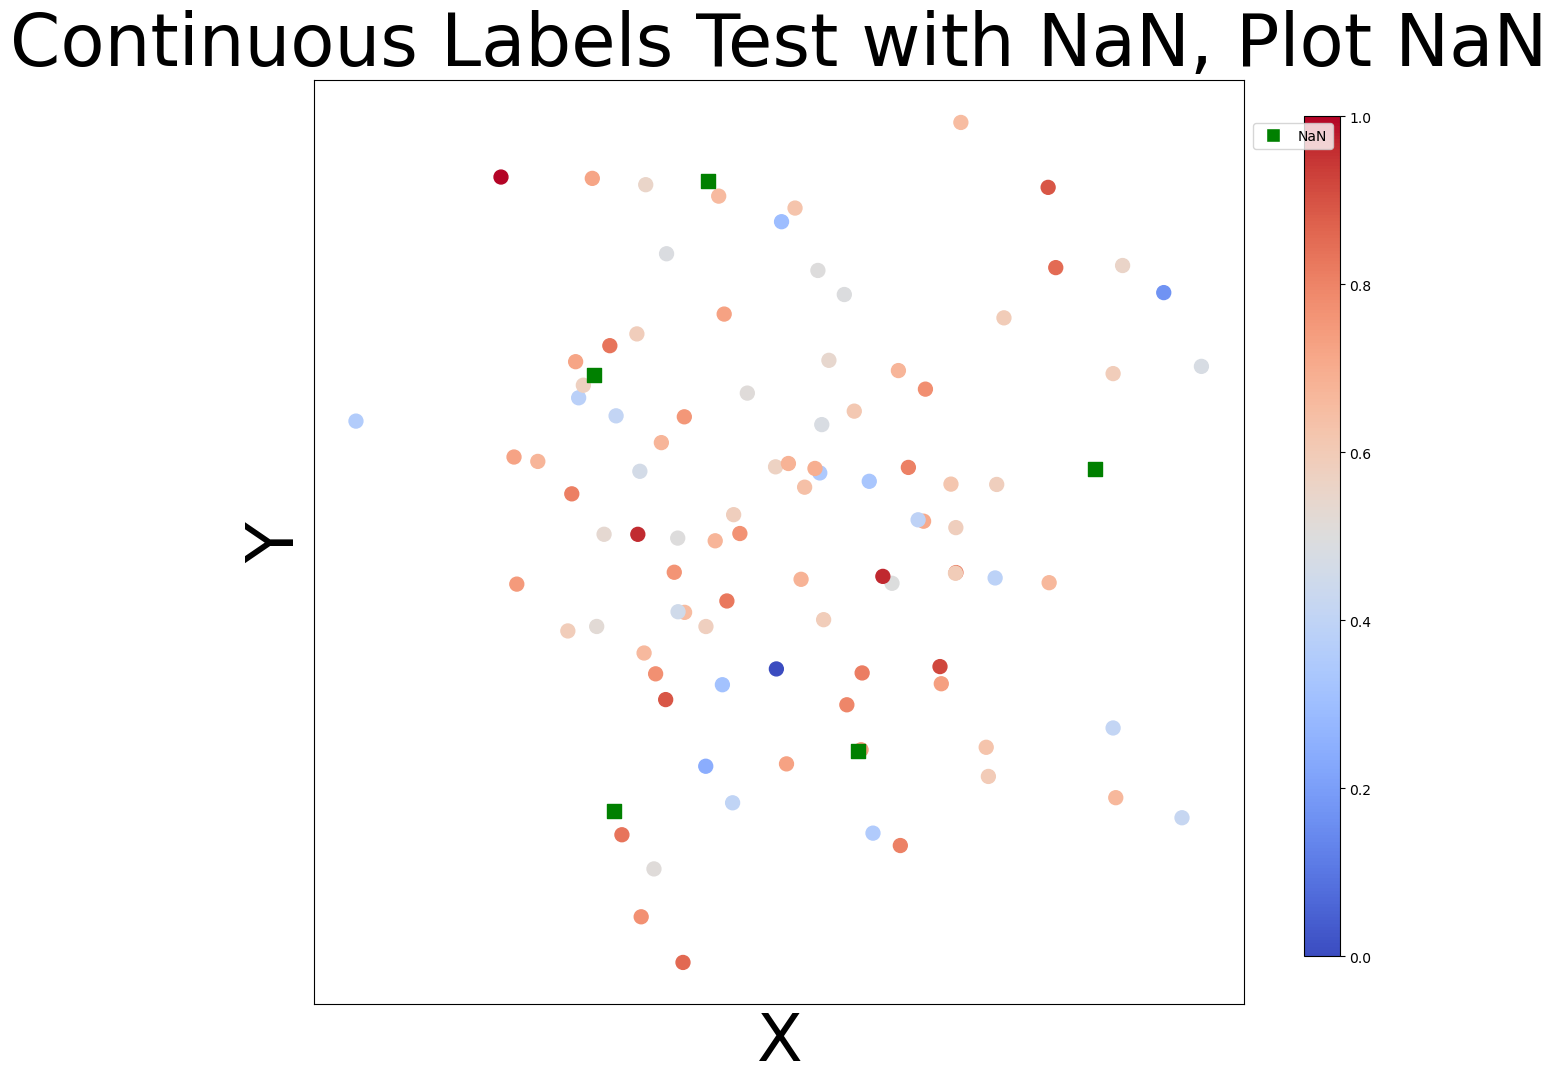

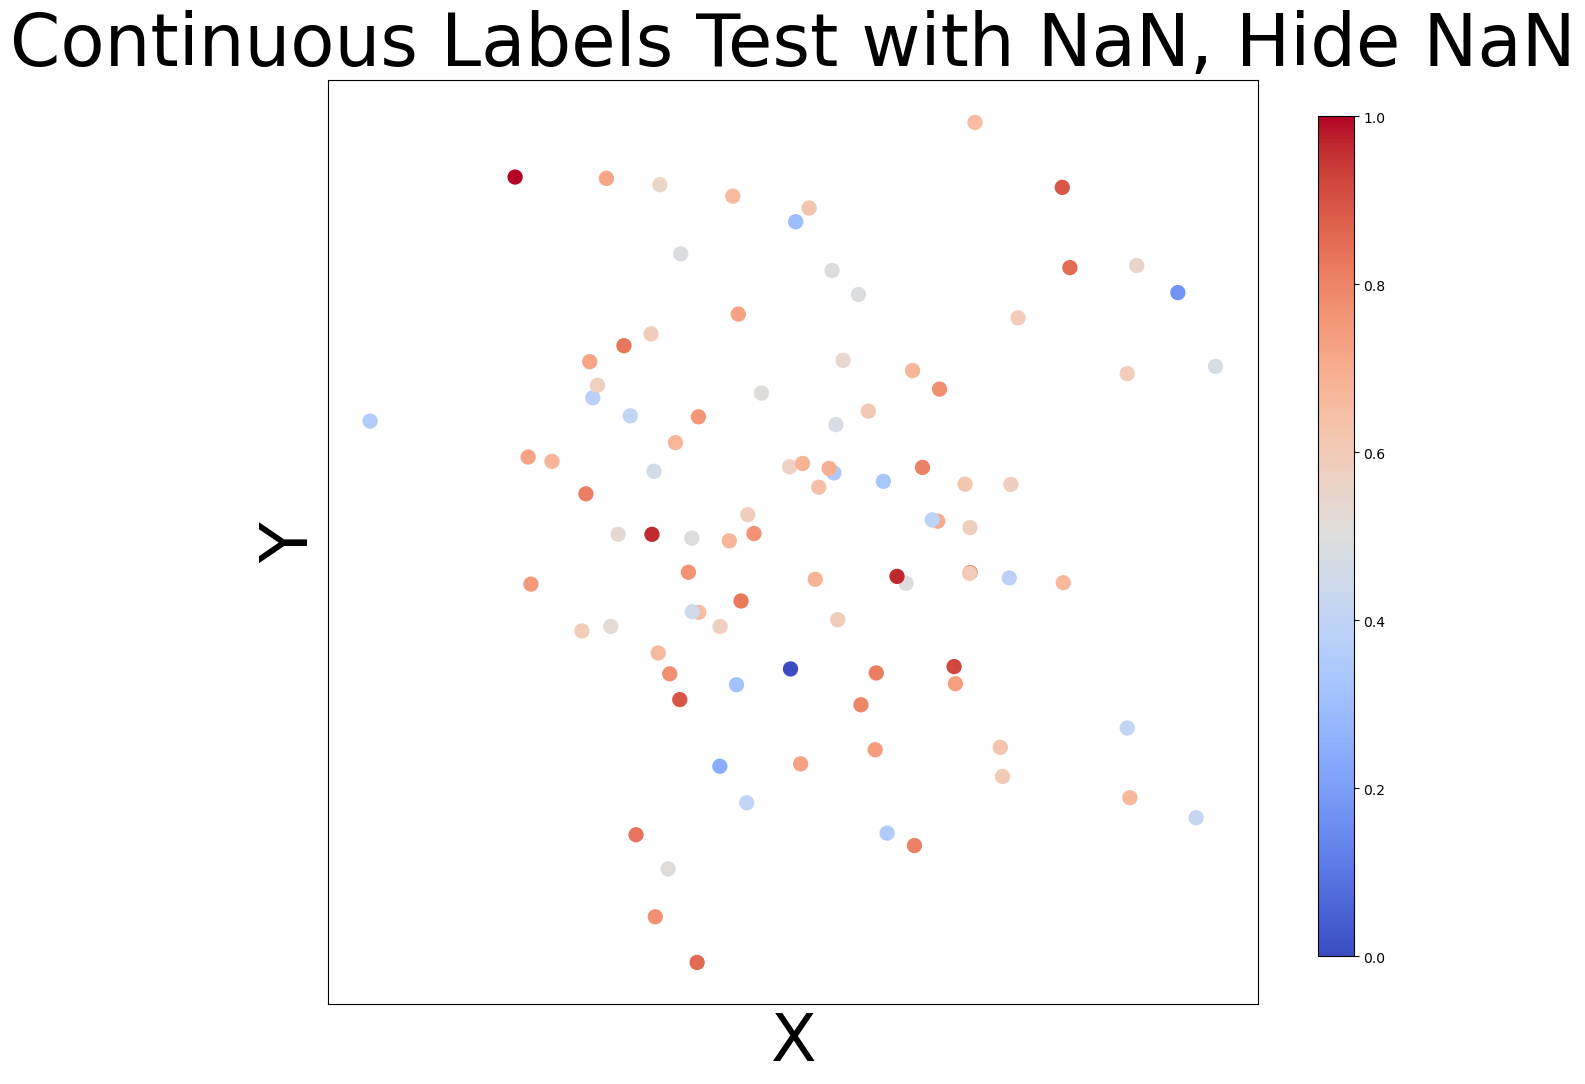

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from contextualized.analysis.embeddings import plot_lowdim_rep


# set example
sample_N = 100
np.random.seed(0)
X = np.random.randn(sample_N, 2)

# -----------------------------
# 1. Discrete labels (categorical features)
# -----------------------------
labels_discrete = np.random.choice(["A", "B", "C"], size=sample_N) # Test with string labels

plot_lowdim_rep(
    low_dim=X,
    labels=labels_discrete,
    title="Discrete Labels Test",
    # cbar_label="",
    figname="discrete_labels_test",
)

# -----------------------------
# 2. Continuous labels (numerical features)
# -----------------------------
labels_cont = np.random.normal(loc=5.0, scale=2.0, size=sample_N)

plot_lowdim_rep(
    low_dim=X,
    labels=labels_cont,
    title="Continuous Labels Test",
    # cbar_label="",    
    figname="continuous_labels_test",
)

# -----------------------------
# 3. Too Many Discrete labels(automatically convert to continuous labels)
# -----------------------------
# labels_many = np.random.choice([f"Class_{i}" for i in range(15)], size=300)
labels_many = pd.Series(
    np.random.choice([f"Class_{i}" for i in range(15)], size=sample_N) # >10 categories => continuous
).astype("category").cat.codes

plot_lowdim_rep(
    low_dim=X,
    labels=labels_many,
    title="Too Many Discrete Labels Test",
    # cbar_label="",
    figname="Too_many_discrete_labels_test",
)

# -----------------------------
# 4. NaN values in discrete labels; simple, NaN regarded as another category
# -----------------------------
# labels_nan = labels_discrete.astype(object)
# labels_nan = pd.Series(np.random.choice(["A", "B", "C"], size=300)).astype("category").cat.codes.astype(object)
labels_nan = np.random.choice(["A", "B", "C"], size=sample_N)
labels_nan[::20] = np.nan  # put NaN in every 20th element

plot_lowdim_rep(
    low_dim=X,
    labels=labels_nan,
    title="Discrete Labels Test with NaN",
    # cbar_label="",
    figname="discrete_labels_test_with_nan",
)

# -----------------------------
# 5. NaN values in continuous labels;
# -----------------------------
labels_nan = pd.Series(np.random.normal(loc=5.0, scale=2.0, size=sample_N))
labels_nan[::20] = np.nan  # put NaN in every 20th element

plot_lowdim_rep(
    low_dim=X,
    labels=labels_nan,
    title="Continuous Labels Test with NaN, Plot NaN",
    # cbar_label="",
    figname="continuous_labels_test_with_nan_plot_nan",
    plot_nan=True
)

plot_lowdim_rep(
    low_dim=X,
    labels=labels_nan,
    title="Continuous Labels Test with NaN, Hide NaN",
    # cbar_label="",
    figname="continuous_labels_test_with_nan_hide_nan",
    plot_nan=False
)

# # -----------------------------
# # 5. use plot_embedding_for_all_covars()
# # -----------------------------
# df = pd.DataFrame({
#     "cat_label": labels_discrete,
#     "num_label": labels_cont
# })

# plot_embedding_for_all_covars(
#     reps=X,
#     covars_df=df,
#     dithering_pct=0.01,
#     cbar_fontsize=24,
#     title_fontsize=24,
#     xlabel_fontsize=20,
#     ylabel_fontsize=20,
#     alpha=0.8
# )

# display and save the plots
# from IPython.display import Image, display
# for name in ["colorbar_discrete", "colorbar_continuous", "colorbar_many_classes", "colorbar_with_nan"]:
#     display(Image(filename=name + ".pdf"))
